In [45]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('./NATURAL_DISASTERS.csv')

# Define a dictionary to map month names to integers
month_to_int = {
    'January': 1, 'Feburary': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map the "Affected Month" column to integer values
df['Month'] = df['Affected Month'].map(month_to_int)

# Group by "Year" and "Month" and count occurrences
df['Natural_Disasters'] = df.groupby(['Affected Year', 'Month'])['Id'].transform('count')

# Create a new DataFrame with the specified columns
natural_disasters_df = df[['Id', 'Affected Year', 'Month', 'Natural_Disasters']]

# Rename the "Affected Year" column to "Year"
natural_disasters_df = natural_disasters_df.rename(columns={'Affected Year': 'Year'})

# Drop duplicate rows based on "Year," "Month," and "Natural_Disasters" columns
natural_disasters_df = natural_disasters_df.drop_duplicates(subset=['Year', 'Month', 'Natural_Disasters'])

# Print the resulting DataFrame
print(natural_disasters_df)

    Id  Year  Month  Natural_Disasters
0    1  1984      7                  1
1    2  1986      2                  1
2    3  1986      4                  1
3    4  1989      6                  1
4    5  1990      1                  1
..  ..   ...    ...                ...
62  64  2022      6                  1
63  65  2022      8                  1
64  66  2023      5                  2
66  68  2023      8                  1
67  69  2023     10                  1

[64 rows x 4 columns]


In [46]:
import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../../CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the '.csv' extension
    label = os.path.basename(file).replace('.csv', '')
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Convert 'Trade Date' to datetime format
combined_df['Trade Date'] = pd.to_datetime(combined_df['Trade Date'], format='%m/%d/%y')

# Extract 'Month' and 'Year' from 'Trade Date'
combined_df['Month'] = combined_df['Trade Date'].dt.month
combined_df['Year'] = combined_df['Trade Date'].dt.year

# Select the columns 'Label', 'Month', 'Year', and 'Close (Rs.)'
selected_columns = ['Label', 'Month', 'Year', 'Close (Rs.)']

# Group by 'Label', 'Month', and 'Year' and calculate the mean value of 'Close (Rs.)'
result_df = combined_df[selected_columns].groupby(['Label', 'Month', 'Year']).mean().reset_index()

# Sort the DataFrame by 'Year' and 'Month'
result_df = result_df.sort_values(by=['Year', 'Month'])

# Reset the index for the result DataFrame
result_df = result_df.reset_index(drop=True)

print(result_df)

            Label  Month  Year  Close (Rs.)
0       JKH.N0000      8  1986     0.000000
1       SUN.N0000      3  1990    12.500000
2      GREG.N0000      4  1990     0.500000
3      SELI.N0000      1  1991   550.000000
4      SHAL.N0000      2  1991   575.000000
...           ...    ...   ...          ...
40419  VPEL.N0000     10  2023     6.850000
40420  WAPO.N0000     10  2023    31.410000
40421  WATA.N0000     10  2023    74.180000
40422  WIND.N0000     10  2023    18.620000
40423  YORK.N0000     10  2023   161.357143

[40424 rows x 4 columns]


In [47]:
# Merge the result_df with natural_disasters_df on 'Month' and 'Year'
result_df = result_df.merge(natural_disasters_df, on=['Month', 'Year'], how='left')

# Fill missing values (where no match was found) with 0
result_df['Natural_Disasters'] = result_df['Natural_Disasters'].fillna(0)

# Reorder the columns if needed
result_df = result_df[['Label', 'Month', 'Year', 'Natural_Disasters', 'Close (Rs.)']]

# Print the resulting DataFrame
print(result_df)

            Label  Month  Year  Natural_Disasters  Close (Rs.)
0       JKH.N0000      8  1986                0.0     0.000000
1       SUN.N0000      3  1990                0.0    12.500000
2      GREG.N0000      4  1990                0.0     0.500000
3      SELI.N0000      1  1991                0.0   550.000000
4      SHAL.N0000      2  1991                0.0   575.000000
...           ...    ...   ...                ...          ...
40419  VPEL.N0000     10  2023                1.0     6.850000
40420  WAPO.N0000     10  2023                1.0    31.410000
40421  WATA.N0000     10  2023                1.0    74.180000
40422  WIND.N0000     10  2023                1.0    18.620000
40423  YORK.N0000     10  2023                1.0   161.357143

[40424 rows x 5 columns]


In [48]:
# Export the DataFrame to a CSV file
result_df.to_csv('share_value_vs_natural_disasters.csv', index=False)

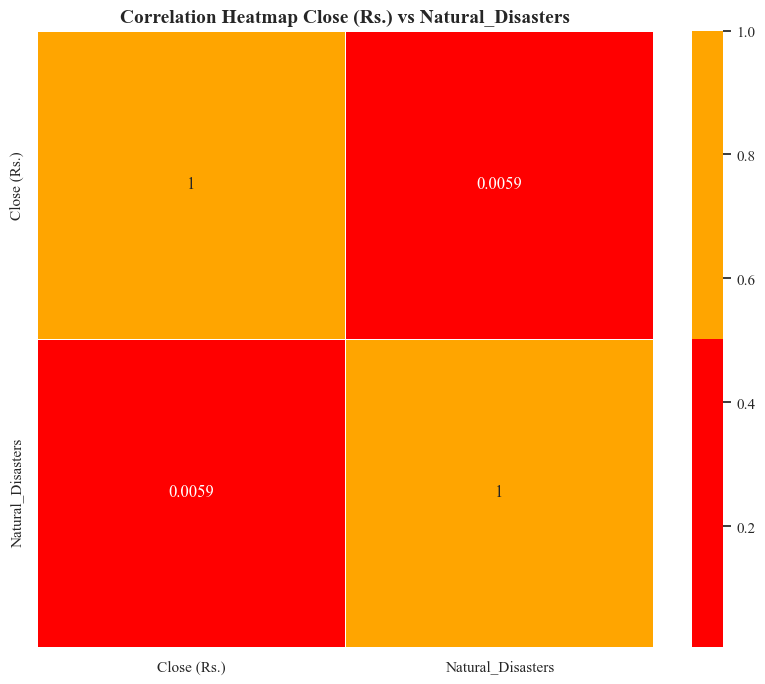

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame
data = pd.read_csv('./final_natural_disasters_vs_stock_values.csv')

df = pd.DataFrame(data)

# Select the columns you want for the heatmap
columns = ['Close (Rs.)', 'Natural_Disasters']

# Create a correlation matrix
corr_matrix = df[columns].corr()

# Create custom color palette with "Close (Rs.)" in red and "Loan Rate" in green
colors = ['red', 'orange']
cmap = sns.color_palette(colors, as_cmap=True)

# Set the font style to Times New Roman
sns.set(style="white", font='Times New Roman')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5, square=True)
plt.title('Correlation Heatmap Close (Rs.) vs Natural_Disasters', fontweight='bold', fontsize=14)
plt.show()